In [38]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt

In [157]:
class Perceptron():

  def __init__(self, learning_rate=0.01, epochs=10, interval = 1, random_state = False):
    self.learning_rate = learning_rate
    self.n_iterations = epochs
    self.interval = interval
    self.random_state = random_state

  def fit(self, X, y):

    n = X.shape[0]

    # 가중치를 작은 랜덤값으로 설정
    if self.random_state :
      self.weights = np.random.rand(1 + X.shape[1]) * 0.01
    # 가중치를 0으로 설정
    else :
      self.weights = np.zeros(1 + X.shape[1])

    # 오분류한 데이터 포인트의 개수를 저장하는 array 생성
    self.errors_ = []

    # 최고 성능과 그때의 가중치 기록
    self.best_weights_ = None
    self.best_accuracy_ = 0
    self.best_epoch_ = -1

    # 학습 시작
    for i in range(self.n_iterations):
      error_count = 0
      for xi, target in zip(X, y):
          # 수정 적용 여부
          update = self.learning_rate * (target - self.predict(xi))
          # 가중치 업데이트
          self.weights[1:] += update * xi
          # 절편 업데이트
          self.weights[0] += update
          error_count += int(update != 0.0)

      self.errors_.append(error_count)
      accuracy = 1 - (error_count / n)

      if i % self.interval == 0:
        print(f'Epoch {i+1}/{self.n_iterations}, Accuracy: {accuracy:.2f}')

      # 최고 성능의 가중치를 업데이트
      if accuracy > self.best_accuracy_:
        self.best_accuracy_ = accuracy
        self.best_weights_ = self.weights.copy()  # 가중치를 복사해서 저장
        self.best_epoch_ = i + 1

    print(f'\nBest Epoch {self.best_epoch_}, Best Accuracy: {self.best_accuracy_:.2f}')

    return self

  # 추정함수 결과 : f(x)= Wx+W_0
  def net_input(self, X):
      return np.dot(X, self.weights[1:]) + self.weights[0]

  def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, 0)

#### 테스트 데이터 생성 및 시각화

In [159]:
# Test 1 : 깔끔한 선형 분리 가능
X, y = make_classification(
    n_samples=100,          # 총 데이터 샘플의 수 (예: 100개)
    n_features=2,           # 피처(독립 변수)의 수 (여기서 2로 설정)
    n_informative=2,        # 예측에 유용한 피처의 수 (피처 2개 모두 유용하게)
    n_redundant=0,          # 중복된 피처의 수 (0으로 설정하여 모든 피처가 유용하게)
    n_clusters_per_class=1, # 각 클래스당 클러스터 수 (간단한 분류를 위해 1로 설정)
    n_classes=2,            # 이진 분류를 위한 클래스 수 (0과 1)
    random_state=42         # 재현성을 위한 랜덤 시드
)

In [131]:
# Test 2 : 일부분 선형 분리 불가능
X, y = make_classification(
    n_samples=100,          # 총 데이터 샘플의 수 (예: 100개)
    n_features=2,           # 피처(독립 변수)의 수 (여기서 2로 설정)
    n_informative=2,        # 예측에 유용한 피처의 수 (피처 2개 모두 유용하게)
    n_redundant=0,          # 중복된 피처의 수 (0으로 설정하여 모든 피처가 유용하게)
    n_clusters_per_class=1, # 각 클래스당 클러스터 수 (간단한 분류를 위해 1로 설정)
    n_classes=2,            # 이진 분류를 위한 클래스 수 (0과 1)
    random_state=21         # 재현성을 위한 랜덤 시드
)

In [112]:
# Test 3 : 중간에 멈춰야됨
X, y = make_classification(
    n_samples=100,          # 총 데이터 샘플의 수 (예: 100개)
    n_features=2,           # 피처(독립 변수)의 수 (여기서 2로 설정)
    n_informative=2,        # 예측에 유용한 피처의 수 (피처 2개 모두 유용하게)
    n_redundant=0,          # 중복된 피처의 수 (0으로 설정하여 모든 피처가 유용하게)
    n_clusters_per_class=1, # 각 클래스당 클러스터 수 (간단한 분류를 위해 1로 설정)
    n_classes=2,            # 이진 분류를 위한 클래스 수 (0과 1)
    random_state=58         # 재현성을 위한 랜덤 시드
)

In [160]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

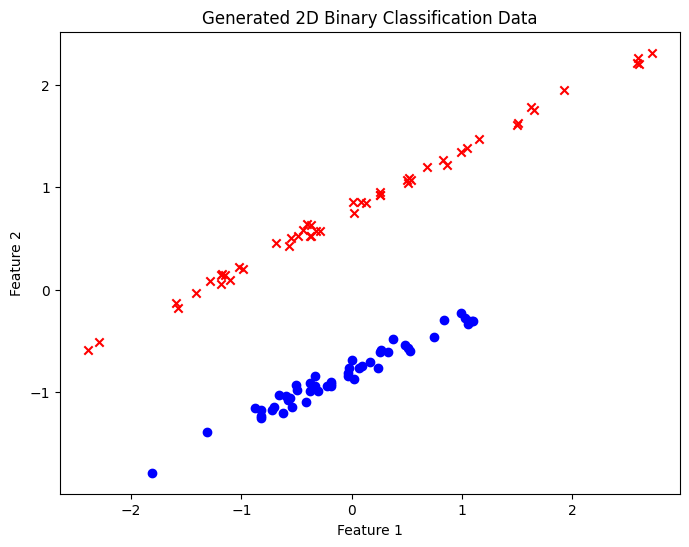

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated 2D Binary Classification Data')
plt.show()

#### 데이터 학습

In [162]:
perceptron = Perceptron(learning_rate=0.01, epochs=30, interval = 1, random_state = False)

perceptron.fit(X, y)

Epoch 1/30, Accuracy: 0.94
Epoch 2/30, Accuracy: 1.00
Epoch 3/30, Accuracy: 1.00
Epoch 4/30, Accuracy: 1.00
Epoch 5/30, Accuracy: 1.00
Epoch 6/30, Accuracy: 1.00
Epoch 7/30, Accuracy: 1.00
Epoch 8/30, Accuracy: 1.00
Epoch 9/30, Accuracy: 1.00
Epoch 10/30, Accuracy: 1.00
Epoch 11/30, Accuracy: 1.00
Epoch 12/30, Accuracy: 1.00
Epoch 13/30, Accuracy: 1.00
Epoch 14/30, Accuracy: 1.00
Epoch 15/30, Accuracy: 1.00
Epoch 16/30, Accuracy: 1.00
Epoch 17/30, Accuracy: 1.00
Epoch 18/30, Accuracy: 1.00
Epoch 19/30, Accuracy: 1.00
Epoch 20/30, Accuracy: 1.00
Epoch 21/30, Accuracy: 1.00
Epoch 22/30, Accuracy: 1.00
Epoch 23/30, Accuracy: 1.00
Epoch 24/30, Accuracy: 1.00
Epoch 25/30, Accuracy: 1.00
Epoch 26/30, Accuracy: 1.00
Epoch 27/30, Accuracy: 1.00
Epoch 28/30, Accuracy: 1.00
Epoch 29/30, Accuracy: 1.00
Epoch 30/30, Accuracy: 1.00

Best Epoch 2, Best Accuracy: 1.00


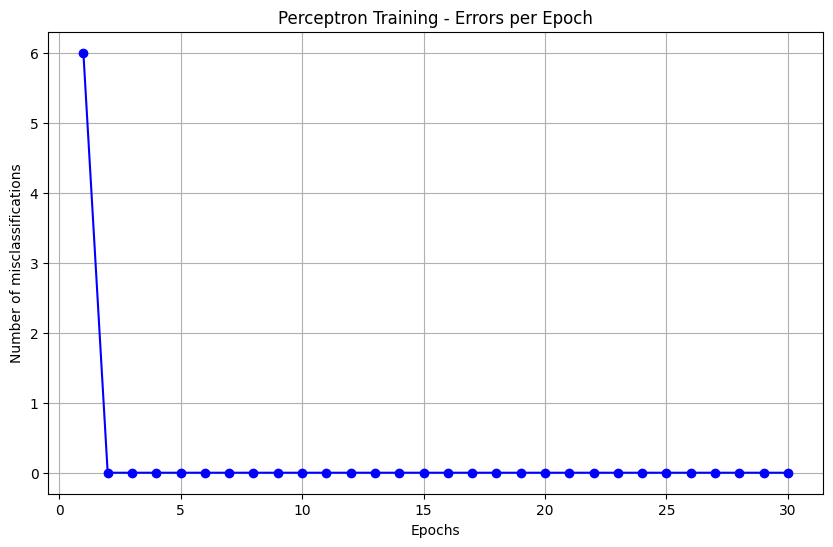

In [163]:
# Step 4: Visualize the errors per iteration
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o', linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Training - Errors per Epoch')
plt.grid()
plt.show()

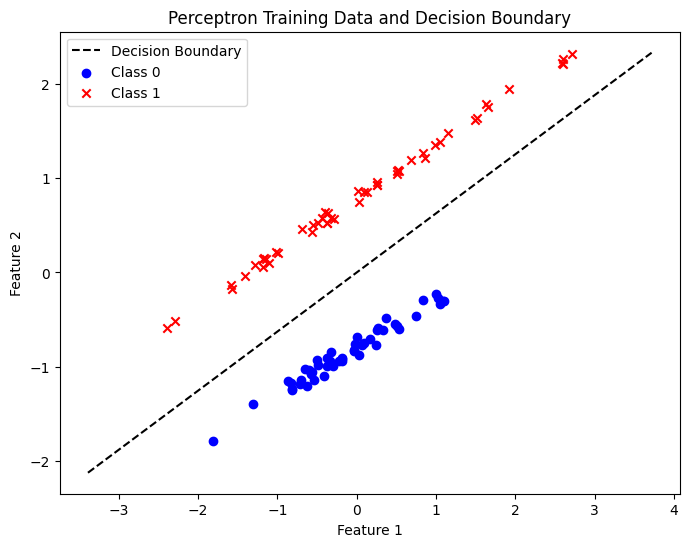

In [164]:
# Plot the decision boundary
# Calculate the slope and intercept of the line
slope = -perceptron.best_weights_[1] / perceptron.best_weights_[2]
intercept = -perceptron.best_weights_[0] / perceptron.best_weights_[2]

# Plot the line
x_values = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])  # x values, a little beyond the training data
y_values = slope * x_values + intercept  # corresponding y values according to the line equation
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, 'k--', label='Decision Boundary')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.title('Perceptron Training Data and Decision Boundary')

plt.show()
